Generating the images for the dataset

Classes: (livro geometa)
"triangel",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",

In [17]:
from PIL import Image, ImageDraw
import random
import os
import numpy as np

random.seed(13)

metadata = {
    "train": {
        "labels": [
            "triangle",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",
            "circle"
        ],
        "size": 700,  # for each label
    },
    "val": {
        "labels": [
            "triangle",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",
            "circle"
        ],
        "size": 200,  # for each label
    },
    "test": {
        "labels": [
            "triangle",
            "square",
            "rectangle",
            "trapeze",
            "rhombus",
            "parallelogram",
            "pentagon",
            "hexagon",
            "circle"
        ],
        "size": 100,  # for each label
    },
}

os.makedirs("data", exist_ok=True)
for step in list(metadata.keys()):
    os.makedirs(f"data/{step}", exist_ok=True)
    for label in metadata[step]["labels"]:
        os.makedirs(f"data/{step}/{label}", exist_ok=True)
        for i in range(metadata[step]["size"]):
            img = Image.new("RGB", (100, 100), (0, 0, 0))
            draw = ImageDraw.Draw(img)
            min, max = 10, 90
            # 3 pontos aleatórios
            if label == "triangle":
                x = random.sample(range(min, max), 3)
                y = random.sample(range(min, max), 3)

                draw.polygon(
                    (
                        (x[0], y[0]),
                        (x[1], y[1]),
                        (x[2], y[2]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "square":
                coord = random.sample(range(min, max), 2)

                draw.polygon(
                    (
                        (coord[0], coord[0]),
                        (coord[0], coord[1]),
                        (coord[1], coord[1]),
                        (coord[1], coord[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "rectangle":
                x = sorted(random.sample(range(min, max), 2))
                y = sorted(random.sample(range(min, max), 2))

                draw.polygon(
                    (
                        (x[0], y[0]),
                        (x[0], y[1]),
                        (x[1], y[1]),
                        (x[1], y[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "trapeze":
                x = sorted(random.sample(range(min, max), 4))
                y = sorted(random.sample(range(min, max), 2))

                draw.polygon(
                    ((x[0], y[0]), (x[1], y[1]), (x[2], y[1]), (x[3], y[0])),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "rhombus":
                x = random.sample(
                    range(int((min + max) / 2 - min), int((min + max) / 2 + min)), 1
                )
                y = random.sample(
                    range(int((min + max) / 2 - min), int((min + max) / 2 + min)), 1
                )
                varx, vary = random.sample(range(min, int((min + max) / 2 - min)), 2)

                draw.polygon(
                    (
                        (x[0] - varx, y[0]),
                        (x[0], y[0] + vary),
                        (x[0] + varx, y[0]),
                        (x[0], y[0] - vary),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "parallelogram":
                x = random.sample(
                    range(
                        int((min + max) / 2 - 2 * min), int((min + max) / 2 + 2 * min)
                    ),
                    2,
                )
                y = sorted(random.sample(range(min, max), 2))
                varx = random.sample(
                    range(min * (-1), int((min + max) / 2 - 2 * min)), 1
                )

                draw.polygon(
                    (
                        (x[0], y[0]),
                        (x[1], y[0]),
                        (x[1] + varx[0], y[1]),
                        (x[0] + varx[0], y[1]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "pentagon":
                x = sorted(random.sample(range(min, max), 5))
                y = sorted(random.sample(range(min, max), 5))

                draw.polygon(
                    (
                        (x[0], y[2]),
                        (x[2], y[4]),
                        (x[4], y[3]),
                        (x[3], y[1]),
                        (x[1], y[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "hexagon":
                x = sorted(random.sample(range(min, max), 6))
                y = sorted(random.sample(range(min, max), 3))

                draw.polygon(
                    (
                        (x[0], y[1]),
                        (x[1], y[2]),
                        (x[3], y[2]),
                        (x[5], y[1]),
                        (x[4], y[0]),
                        (x[2], y[0]),
                    ),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            elif label == "circle":
                x = random.randint(
                    int((min + max) / 2 - 2 * min), int((min + max) / 2 + 2 * min)
                )
                y = random.randint(
                    int((min + max) / 2 - 2 * min), int((min + max) / 2 + 2 * min)
                )
                radius = random.randint(
                    min, int((min + max) / 2 - 2 * min)
                )

                draw.ellipse(
                    (x - radius, y - radius, x + radius, y + radius),
                    fill=(0, 0, 0),
                    outline=(255, 255, 255),
                )

            img = img.rotate(random.randint(1, 360))

            # aplicando ruído
            # Converter a imagem em um array NumPy
            img = np.array(img)

            # Definir a intensidade do ruído (um valor pequeno é geralmente suficiente)
            ruido = 120

            # Gerar ruído aleatório com a mesma forma que a imagem
            ruido = np.random.normal(0, ruido, img.shape)

            # Adicionar o ruído à imagem
            img = img + ruido

            # Converter de volta para uma imagem do tipo uint8
            img = np.uint8(np.clip(img, 0, 255))

            # Criar uma nova imagem com o ruído
            img = Image.fromarray(img)
            img.save(f"data/{step}/{label}/imagem_{i}.jpg")

# Pré-processamento da imagem

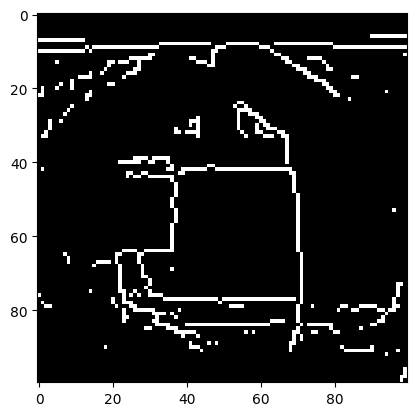

In [14]:
import cv2 as cv
import numpy as np
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

path = 'test2.jpg'

# Carregue a imagem RGB
img = cv.imread(path)

width, height, i = img.shape

# Aplica o redimensionamento
img_pos = cv.resize(img, (100, 100))

# Converte a imagem RGB em escala de cinza
img_pos = cv.cvtColor(img_pos, cv.COLOR_BGR2GRAY)

# Normaliza a imagem para o intervalo [0, 255]
img_pos = cv.normalize(img_pos, None, 0, 255, cv.NORM_MINMAX)

# Aplique uma operação de equalização de histograma para melh orar o contraste
img_pos = cv.equalizeHist(img_pos)

# Matriz de convolução
kernel = np.ones((3, 3), np.uint8)

img_pos = cv.dilate(img_pos, kernel, iterations=4)

edges = cv.Canny(img_pos,100,100)

# Aplica o redimensionamento
img = cv.resize(img, (400, 400))
img_pos = cv.resize(img_pos, (400, 400))

plt.imshow(edges,cmap = 'gray')
# Salve ou mostre a imagem em escala de cinza
cv.imshow('Imagem original', img)
cv.imshow('Imagem Processada', img_pos)
cv.waitKey(0)
cv.destroyAllWindows()